In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/glove-100-300-features/glove.6B.300d.txt
/kaggle/input/glove-100-300-features/glove.6B.100d.txt
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [19]:
import nltk

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

Corona=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin1')

Corona.Sentiment.replace(to_replace='Extremely Positive', value='Positive',inplace=True)
Corona.Sentiment.replace(to_replace='Extremely Negative', value='Negative',inplace=True)
print(Corona.Sentiment.value_counts())
Corona = Corona[['OriginalTweet','Sentiment']]
Corona.head(10)

Sentiment
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


In [21]:
Corona.shape

(41157, 2)

****Cleaning the dataset by removing some text ********

In [22]:
import re
import string
stop_words = stopwords.words("english")
def clean_text(text):
    text = text.lower()
    # remove mentions
    text = re.sub("@\S+", " ", text)
    # remove url
    text = re.sub("https*\S+", " ", text)
    # remove hashtags
    text = re.sub("#\S+", " ", text)
    # remove all numbers
    text = re.sub("\d", " ", text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove extra spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    # stopwords     
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # remove non-Latin characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [23]:
Corona.OriginalTweet=Corona.OriginalTweet.apply(clean_text)

In [24]:
sample=Corona.iloc[:]

In [25]:
sample

,OriginalTweet,Sentiment
0,,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock one empty please panic enough food ...,Positive
4,ready go supermarket outbreak paranoid food st...,Negative
...,...,...
41152,airline pilots offering stock supermarket shel...,Neutral
41153,response complaint provided citing covid relat...,Negative
41154,know its getting tough rationing toilet paper ...,Positive
41155,wrong smell hand sanitizer starting turn,Neutral


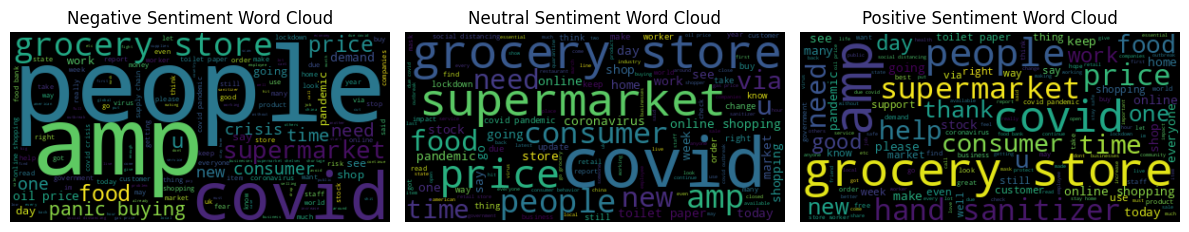

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


'''This code generates word clouds for each sentiment category 
(Negative, Neutral, and Positive) 
based on the concatenated text of tweets in each category'''
negative_text = ' '.join(sample[sample.Sentiment == 'Negative'].OriginalTweet.tolist())
neutral_text = ' '.join(sample[sample.Sentiment == 'Neutral'].OriginalTweet.tolist())
positive_text = ' '.join(sample[sample.Sentiment == 'Positive'].OriginalTweet.tolist())

# Create WordCloud objects for each sentiment
negative_wordcloud = WordCloud().generate(negative_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
positive_wordcloud = WordCloud().generate(positive_text)

# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(12, 8))

# Negative Word Cloud
plt.subplot(131)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(132)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

# Positive Word Cloud
plt.subplot(133)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

### Using Word2Vec Embeddings

In [27]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_lg')

In [28]:
# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# It's that simple - all of the vectors and words are assigned after this point

In [29]:
# Get the vector for 'text':
doc[-3], doc[-3].vector

(processing,
 array([-0.98158 , -2.6326  , -0.02352 ,  3.2856  ,  3.63    , -1.2795  ,
         3.6477  ,  4.1457  , -3.911   , -1.8988  ,  6.3144  ,  3.7014  ,
        -5.9561  ,  5.1211  , -1.8175  , -1.0002  ,  7.4333  ,  1.6981  ,
        -4.4509  , -1.9858  , -2.1477  ,  3.4198  , -5.8983  ,  1.8785  ,
        -3.4049  , -2.1389  , -0.63041 , -1.8979  ,  0.10881 , -0.63591 ,
         3.8009  ,  0.89979 , -4.6852  ,  0.17034 , -0.29025 , -5.6625  ,
         4.1363  ,  1.0943  ,  3.3971  ,  1.8353  ,  0.15847 , -0.96643 ,
         2.9794  , -0.68237 , -4.4391  ,  2.494   ,  4.9149  , -0.63641 ,
        -2.7878  , -2.0478  , -0.20991 ,  3.1249  , -1.678   , -5.3789  ,
        -2.6653  ,  0.82363 , -2.2348  ,  1.5312  ,  1.861   , -2.0801  ,
         4.343   ,  1.5988  , -2.3153  ,  0.62286 ,  3.0526  ,  1.7596  ,
        -3.0563  , -4.1593  , -1.0461  ,  0.62876 , -2.6396  ,  0.23815 ,
        -3.8904  ,  2.0345  , -1.1544  , -0.37425 , -5.1358  ,  3.371   ,
         0.90354 , -0.215

### We want the vector for the entire sentence, so we get the mean vector

In [30]:
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector

array([ 0.13538204, -0.50049055,  0.26314098, -1.8586416 , -0.57580197,
       -0.07358702, -0.035399  ,  4.4508467 , -3.7474205 ,  1.6460339 ,
        6.90367   ,  1.3508627 , -2.7805922 , -0.6575441 ,  2.2817955 ,
        0.993958  ,  2.383111  , -0.21607213, -1.462939  ,  0.92183   ,
        1.0806081 ,  1.930987  , -3.292195  , -1.8399448 , -2.533392  ,
       -1.9827248 , -1.564382  , -1.138241  , -2.0831861 , -0.430525  ,
       -0.403931  , -0.11929995, -3.6540642 ,  0.19895704, -1.9910061 ,
        0.3238971 , -0.34544173,  0.969619  ,  5.6958246 ,  2.223509  ,
       -1.6114123 ,  2.346086  , -0.700554  , -1.539235  , -1.0771002 ,
        2.6830828 ,  3.4063332 , -2.901462  , -2.5829167 ,  1.1031249 ,
        1.362951  , -0.530291  ,  2.270077  , -4.8443303 , -1.537749  ,
        0.49870294,  2.492154  ,  1.8763611 ,  0.89088696,  0.88795805,
        4.37719   ,  0.06023499, -1.3463123 ,  0.22848296, -1.0967581 ,
        1.9763839 , -2.2734218 , -4.24074   ,  2.6045609 ,  3.91

In [31]:
def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

In [32]:
embeddings=[]
for x in sample.OriginalTweet:
    #print(x)
    #embeddings.append([nlp(word).vector for word in x])
    embeddings.append(nlp(x).vector)

In [33]:
#embeddings[7]

In [34]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#cvec=CountVectorizer()
#X_transformed=cvec.fit_transform(Corona.OriginalTweet)
#X_transformed

X_train, X_test, y_train, y_test = train_test_split(embeddings, sample.Sentiment, test_size=0.2)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted) 
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    print('accuracy score',accuracy_score(y_true, y_predicted))
    print(classification_report(y_true,y_predicted))

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
rf_classifier.fit(X_train, y_train_encoded)

# Accuracy score, confusion matrix, and classification report of RandomForest
rf_acc = accuracy_score(y_test_encoded, rf_classifier.predict(X_test))

print(f"Training Accuracy of RandomForest is {accuracy_score(y_train_encoded, rf_classifier.predict(X_train))}")
print(f"Test Accuracy of RandomForest is {rf_acc} \n")

print(f"Confusion Matrix for RandomForest: \n{confusion_matrix(y_test_encoded, rf_classifier.predict(X_test))}\n")


Training Accuracy of RandomForest is 0.9988458618071374
Test Accuracy of RandomForest is 0.6433430515063168 

Confusion Matrix for RandomForest: 
[[2043   81  990]
 [ 434  400  697]
 [ 651   83 2853]]



Training Accuracy of SVM is 0.8482004555808657
Test Accuracy of SVM is 0.7272837706511176 

Confusion Matrix for SVM: 
[[2333  205  576]
 [ 317  801  413]
 [ 545  189 2853]]



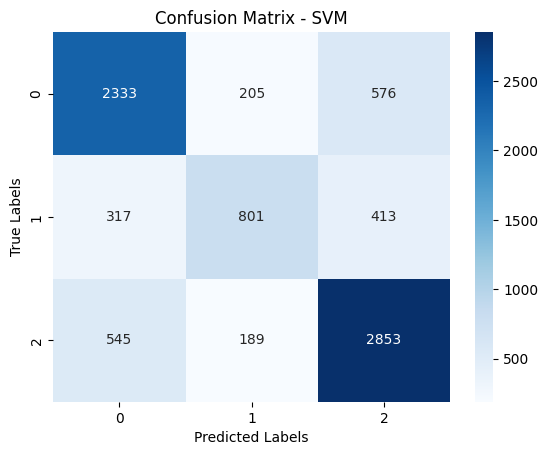

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine Classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train_encoded)

# Accuracy score, confusion matrix, and classification report of SVM
svm_acc = accuracy_score(y_test_encoded, svm_classifier.predict(X_test_scaled))

print(f"Training Accuracy of SVM is {accuracy_score(y_train_encoded, svm_classifier.predict(X_train_scaled))}")
print(f"Test Accuracy of SVM is {svm_acc} \n")

print(f"Confusion Matrix for SVM: \n{confusion_matrix(y_test_encoded, svm_classifier.predict(X_test_scaled))}\n")
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming confusion_matrix, y_test_encoded are already defined

# Create a confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test_encoded, svm_classifier.predict(X_test_scaled)), annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM")
plt.show()


In [40]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming y_train and y_test are your target variables

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth=20, n_estimators=500)
xgb.fit(X_train, y_train_encoded)

# accuracy score, confusion matrix, and classification report of xgboost
xgb_acc = accuracy_score(y_test_encoded, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train_encoded, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test_encoded, xgb.predict(X_test))}\n")


Training Accuracy of XgBoost is 0.9999088838268793
Test Accuracy of XgBoost is 0.7040816326530612 

Confusion Matrix :- 
[[2218  176  720]
 [ 330  744  457]
 [ 571  182 2834]]



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score 0.7090621963070942
              precision    recall  f1-score   support

    Negative       0.73      0.73      0.73      3114
     Neutral       0.62      0.48      0.54      1531
    Positive       0.72      0.79      0.76      3587

    accuracy                           0.71      8232
   macro avg       0.69      0.67      0.67      8232
weighted avg       0.70      0.71      0.70      8232



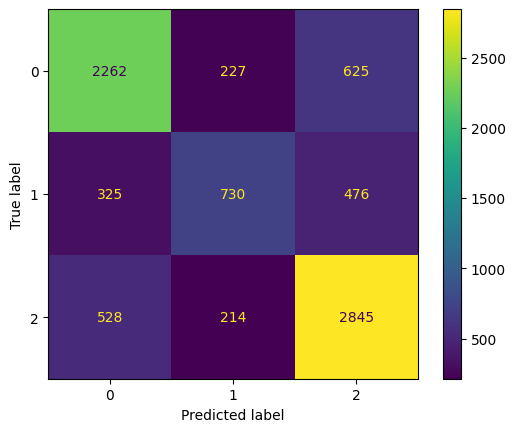

In [36]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression(max_iter=100) 
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


eval_model(y_test, y_pred)

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming y_train and y_test are your target variables

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth=20, n_estimators=500)
xgb.fit(X_train, y_train_encoded)

# accuracy score, confusion matrix, and classification report of xgboost
xgb_acc = accuracy_score(y_test_encoded, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train_encoded, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test_encoded, xgb.predict(X_test))}\n")


accuracy score 0.6392128279883382
              precision    recall  f1-score   support

    Negative       0.65      0.67      0.66      3114
     Neutral       0.66      0.26      0.38      1531
    Positive       0.63      0.78      0.69      3587

    accuracy                           0.64      8232
   macro avg       0.65      0.57      0.58      8232
weighted avg       0.64      0.64      0.62      8232



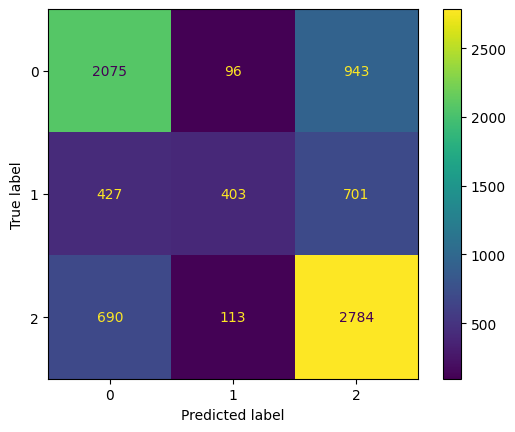

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

eval_model(y_test, rf_y_pred)